# Examen de Cinturón

## Datos Personales

* **Nombre Completo**: Felipe Gonzalez Garrido
* **ID Coding Dojo**: 80479
* **Track**: ADVANCED MACHINE LEARNING V22.1
* **Nombre del examen**: Letras
* **Intento**: 1

## Descripción del Problema 1

Usa este conjunto de datos para analizar las letras que aparecen con más frecuencia en el idioma inglés.

## Descripción del Problema 2

La tarea para la parte 2 es construir un modelo que clasifique letras escritas a mano


## Solución

###Librerias a utilizar

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel("/content/drive/MyDrive/Data CodingDojo/letter_frequency.xlsx")
df.head()

,Unnamed: 0,Letter,Frequency,Proportion
0,0.0,A,8.4966%,43.31
1,1.0,B,2.072%,10.56
2,2.0,C,4.5388%,23.13
3,3.0,D,3.3844%,17.25
4,4.0,E,11.1607%,56.88


### I.- Análisis Exploratorio Parte **1**

**Manipulación de datos**

- Se comenzara con una breve vista a la estructura del conjunto de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26 non-null     float64
 1   Letter      26 non-null     object 
 2   Frequency   26 non-null     object 
 3   Proportion  26 non-null     float64
dtypes: float64(2), object(2)
memory usage: 960.0+ bytes


In [5]:
df.describe()

,Unnamed: 0,Proportion
count,26.000000,26.000000
mean,12.500000,19.603077
std,7.648529,15.385597
min,0.000000,1.000000
25%,6.250000,7.192500
50%,12.500000,15.750000
75%,18.750000,32.747500
max,25.000000,56.880000


In [6]:
df.duplicated().sum()

0

**Con lo revisado podemos concluir que las columnas:**

"Unnamed: 0": es una especie de indice pero en float. Por lo tanto puede ser eliminada.

"Frecuency" : Muestra un porcentaje, incluyendo el simbolo el cual debe ser eliminado para transformar el datatype a float.

**En cuanto al dataframe podemos ver que:**

- No tiene valores nulos
- No tiene valores duplicados

**Eliminacion de columna "Unnamed: 0"**

In [7]:
df.drop(columns="Unnamed: 0", inplace=True)

**Limpieza de columna "Frequency" y transformacion de DataType**

In [8]:
df["Frequency"] = df["Frequency"].str.replace("%","")
df["Frequency"] = df["Frequency"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Letter      26 non-null     object 
 1   Frequency   26 non-null     float64
 2   Proportion  26 non-null     float64
dtypes: float64(2), object(1)
memory usage: 752.0+ bytes


**Visualizacion de frecuencia de las letras**

- Crearemos un dataframe nuevo para cuidar data original, y se utilizara cada letra como indice para ayudar la visualizacion del grafico

In [9]:
df2 = df.copy()
df2.set_index("Letter", inplace=True)

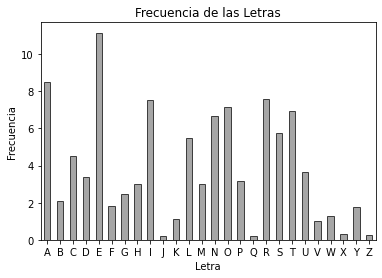

In [10]:
df2["Frequency"].plot(kind="bar", color="gray",alpha=.7, edgecolor="black")
plt.ylabel("Frecuencia")
plt.xlabel("Letra")
plt.title("Frecuencia de las Letras")
plt.xticks(rotation=0,fontsize=10);

- Es posible apreciar claramente que la letra mas utilizada es la "E"

**Utilizar Python o SQL para mostrar las 5 letras más comunes junto con sus frecuencias y proporciones**

In [11]:
df.sort_values(["Frequency"], ascending=False).head()

,Letter,Frequency,Proportion
4,E,11.1607,56.88
0,A,8.4966,43.31
17,R,7.5809,38.64
8,I,7.5448,38.45
14,O,7.1635,36.51


**Utilizar Python o SQL para mostrar las 5 letras menos comunes junto con sus frecuencias y proporciones**

In [12]:
df.sort_values(["Frequency"], ascending=True).head()

,Letter,Frequency,Proportion
16,Q,0.1962,1.00
9,J,0.1965,1.00
25,Z,0.2722,1.39
23,X,0.2902,1.48
21,V,1.0074,5.13


Con la ayuda del metodo .sort_values y el parametro ascending, podemos ordenar el conjunto de datos segun la columna "Frequency" de forma descendente o ascendente dependiendo si es True o False. Mientras que .head() por defecto nos mostrara 5 registros.

**Filtrar el conjunto de datos para mostrar solo filas para vocales (A, E, I, O, U)**

In [13]:
vocales = df["Letter"].isin(["A","E","I","O","U"])
df[vocales]

,Letter,Frequency,Proportion
0,A,8.4966,43.31
4,E,11.1607,56.88
8,I,7.5448,38.45
14,O,7.1635,36.51
20,U,3.6308,18.51


**Fin parte 1**

### I.- Análisis Exploratorio Parte **2**

In [5]:
df1 = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/train.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/test.csv")
df = pd.concat([df1, df2], axis=0)
df.head()

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df.drop(columns="letter")
y = df["letter"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

**Como nuestra columna objetivo esta en forma numerica, es necesario aplicar la clase to_categorical, de keras para el correcto funcionamiento**

In [8]:
y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)

**Se realiza reduccion de dimensionalidad a nuestro conjunto de datos para acelerar su procesamiento. En especial en la iteracion de las Epocas**

In [9]:
pca = PCA(n_components=.98)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### II.- Modelo Neural


Definimos el input_shape con el PCA.98 aplicado para reducir la dimensionalidad.

Debido a la capacidad de computo reducido de google colab esto es extremadamente necesario.

In [10]:
input_shape = X_train.shape[1]
input_shape

192

Se define nuestro modelo secuencial

In [35]:
model = Sequential()

###**Primer modelo neural a utilizar**
- Se realiza de forma minimalista para comprobar que procesos anteriores hayan sido abordados correctamente.
- Debido a los buenos resultados obtenidos con PCA.95 el modelo a continuacion rinde de forma excelente por lo que no fue necesario ajustar mas parametro para una mejor puntuacion o score.

In [36]:
model.add(Dense(192, input_dim = input_shape,activation = 'relu'))
model.add(Dense(26, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
early_stopping = EarlyStopping(patience = 5)

In [43]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=35)

Epoch 1/35
8730/8730 [==============================] - 22s 3ms/step - loss: 2.1845 - acc: 0.9890 - val_loss: 9.6072 - val_acc: 0.9777
Epoch 2/35
8730/8730 [==============================] - 23s 3ms/step - loss: 2.2287 - acc: 0.9896 - val_loss: 10.1868 - val_acc: 0.9774
Epoch 3/35
8730/8730 [==============================] - 22s 3ms/step - loss: 2.2043 - acc: 0.9900 - val_loss: 9.9204 - val_acc: 0.9783
Epoch 4/35
8730/8730 [==============================] - 24s 3ms/step - loss: 2.0895 - acc: 0.9903 - val_loss: 9.7252 - val_acc: 0.9802
Epoch 5/35
8730/8730 [==============================] - 23s 3ms/step - loss: 2.0539 - acc: 0.9906 - val_loss: 9.7720 - val_acc: 0.9809
Epoch 6/35
8730/8730 [==============================] - 26s 3ms/step - loss: 2.1239 - acc: 0.9906 - val_loss: 10.4336 - val_acc: 0.9795
Epoch 7/35
8730/8730 [==============================] - 26s 3ms/step - loss: 2.0365 - acc: 0.9912 - val_loss: 11.2531 - val_acc: 0.9797
Epoch 8/35
8730/8730 [==============================

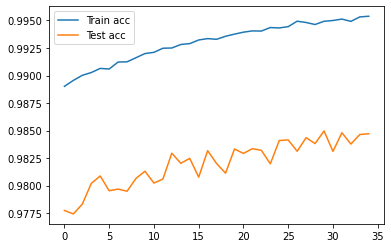

In [45]:
plt.plot(history.history['acc'], label='Train acc')
plt.plot(history.history['val_acc'], label='Test acc')
plt.legend();

In [59]:
model.predict(X_test)

2910/2910 [==============================] - 4s 1ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

**Es posible apreciar que en  35 epocas, nuestro modelo alcanzo un score de .98 lo cual es realmente bueno para nuestras predicciones.**

**Visualizaciones**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

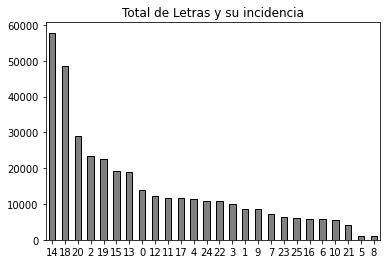

In [55]:
df["letter"].value_counts().plot(kind="bar", color="gray", edgecolor="black");
plt.title("Total de Letras y su incidencia", fontsize=12)
plt.xticks(rotation="horizontal")

- En este grafico podemos apreciar las letras que contiene nuestro conjunto de datos como tambien las mas utilizadas y las menos utilizadas.

Text(0.5, 1.0, 'Letras con mayor incidencia en conjunto de datos')

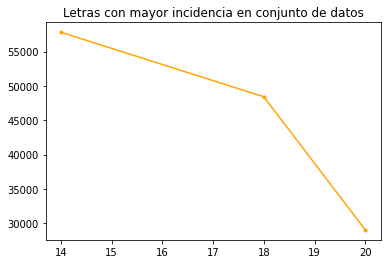

In [53]:
df["letter"].value_counts().head(3).plot(kind="line", marker=".", color="orange")
plt.title("Letras con mayor incidencia en conjunto de datos")

- Top 3 letras con mayor uso, estas corresponden a:

>14: O, la mas utilizada

>18: S, segunda mas utilizada

>20: U, tercera mas utilizada

Con respecto a las 3 letras mas utilizadas, una pequeña busqueda en internet nos dice.

"Osu, significa aguantar bajo presión"



Text(0.5, 1.0, 'Letras con menor incidencia')

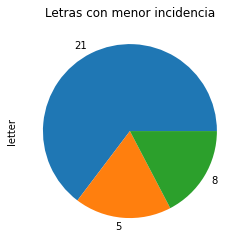

In [51]:
df["letter"].value_counts().tail(3).plot(kind="pie")
plt.title("Letras con menor incidencia", fontsize = 12)

- Y finalmente para mostrar las ultimas letras, o las menos utilizadas. realizamos un pie chart.

21: V

5: F

9: J

## Conclusiones

* Despues del procesamiento dado al conjunto de datos entregado, y dadas sus dimensiones. es posible apreciar el gran poder que nos brindan las redes neuronales al momento de predecir valores.

* La importancia de utilizar todas las herramientas a disposicion para un buen resultado es fundamental. Sin la aplicacion de PCA la realizacion de este problema hubiera sido imposible.
* Con el resultado otorgado con nuestra red neuronal, es posible obtener excelentes resultados de prediccion con datos nuevos.

## Referencias

* [Curso MAT281_2022](https://github.com/fralfaro/MAT281_2022)
* [Curso CodingDojo-DataScience](https://github.com/fralfaro/CodingDojo-DataScience)
* [Plataforma CodingDojo-DataScience](https://login.codingdojo.com/)
* Internet, para traduccion de osu!